## All libraries we need
##### are here

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:

# Load the dataset
path_to_data = 'kaggle_london_house_price_data.csv'
df = pd.read_csv(path_to_data)
df.columns  # Inspect column names


Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')

In [4]:
#df.info() 
#df.head()  # Показать первые 5 строк (по умолчанию) или указать количество строк, например:  df.head(10)
#df.tail() 
#df.shape # rows, columns
#df.describe()
df['currentEnergyRating'].unique() 
#df.iloc[-5:, :]
#df.iloc[2:5,1:6]


array([nan, 'D', 'E', 'C', 'B', 'G', 'F', 'A'], dtype=object)

In [5]:
# Number of rows for each number of bedrooms
bedroom_summary = df['bedrooms'].value_counts().sort_index()
print("Number of rows for each number of bedrooms:")
print(bedroom_summary)

# Filter rows where the number of bedrooms is greater than 8
filtered_data = df[df['bedrooms'] > 8][['bedrooms', 'saleEstimate_currentPrice', 'floorAreaSqM']]

# Display the filtered data
print("\nProperties with more than 8 bedrooms:")
print(filtered_data)

# Optional: Save the filtered data to a CSV file
filtered_data.to_csv('filtered_properties.csv', index=False)

Number of rows for each number of bedrooms:
bedrooms
1.0    49657
2.0    96214
3.0    65392
4.0    29441
5.0    11908
6.0     3134
7.0      645
8.0      198
9.0       65
Name: count, dtype: int64

Properties with more than 8 bedrooms:
        bedrooms  saleEstimate_currentPrice  floorAreaSqM
3149         9.0                  1074000.0         239.0
29826        9.0                   853000.0         330.0
29827        9.0                   853000.0         330.0
29828        9.0                   853000.0         330.0
48414        9.0                  5992000.0         400.0
...          ...                        ...           ...
277649       9.0                   368000.0          28.0
277650       9.0                   368000.0          28.0
277651       9.0                   368000.0          28.0
277652       9.0                   368000.0          28.0
277653       9.0                   368000.0          28.0

[65 rows x 3 columns]


In [6]:
# Modify postcode to retain only the first part and one character after the space
df['postcode'] = df['postcode'].str.extract(r'(\S+ \S)')

In [7]:
df['postcode']

0           E1 8
1           E1 8
2           E1 7
3           E1 7
4           E1 7
           ...  
282867    WC2R 1
282868    WC2R 1
282869    WC2R 1
282870    WC2R 3
282871    WC2R 3
Name: postcode, Length: 282872, dtype: object

In [8]:
postcodes = pd.read_csv('postcodes.csv')

# remove %
postcodes['Percent'] = postcodes['Percent'].str.rstrip('%').astype(float)

print(postcodes.head())

  Postcode  Percent
0    BR1 4     58.0
1    BR1 5     49.0
2    BR3 5     61.0
3     E1 0     58.0
4     E1 1     57.0


In [9]:
# Объединение таблиц по посткодам
df = df.merge(postcodes, left_on='postcode', right_on='Postcode', how='left')



In [10]:
df.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange', 'Postcode',
       'Percent'],
      dtype='object')

In [11]:
# Drop unnecessary columns
df = df.drop(['fullAddress', 'outcode', 'country', 'saleEstimate_ingestedAt','tenure', 'rentEstimate_lowerPrice',
       'rentEstimate_currentPrice', 'rentEstimate_upperPrice',
       'saleEstimate_lowerPrice', 'currentEnergyRating',
       'saleEstimate_upperPrice', 
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'], axis=1)

In [12]:
df = df.drop(columns=['postcode','Postcode'])


In [13]:
df.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'propertyType', 'saleEstimate_currentPrice',
       'saleEstimate_confidenceLevel', 'Percent'],
      dtype='object')

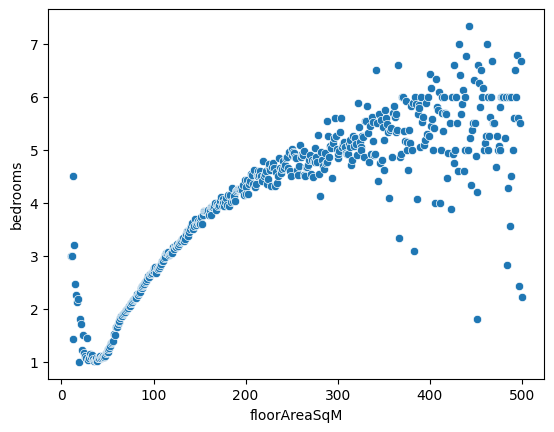

     floorAreaSqM  bedrooms
411         421.0       NaN
431         441.0       NaN
478         490.0       NaN


In [14]:
x = df.groupby(['floorAreaSqM'])['bedrooms'].mean().reset_index()

sns.scatterplot(data=x, x='floorAreaSqM', y='bedrooms')
plt.show()

print(x[x['bedrooms'].isnull() == True])

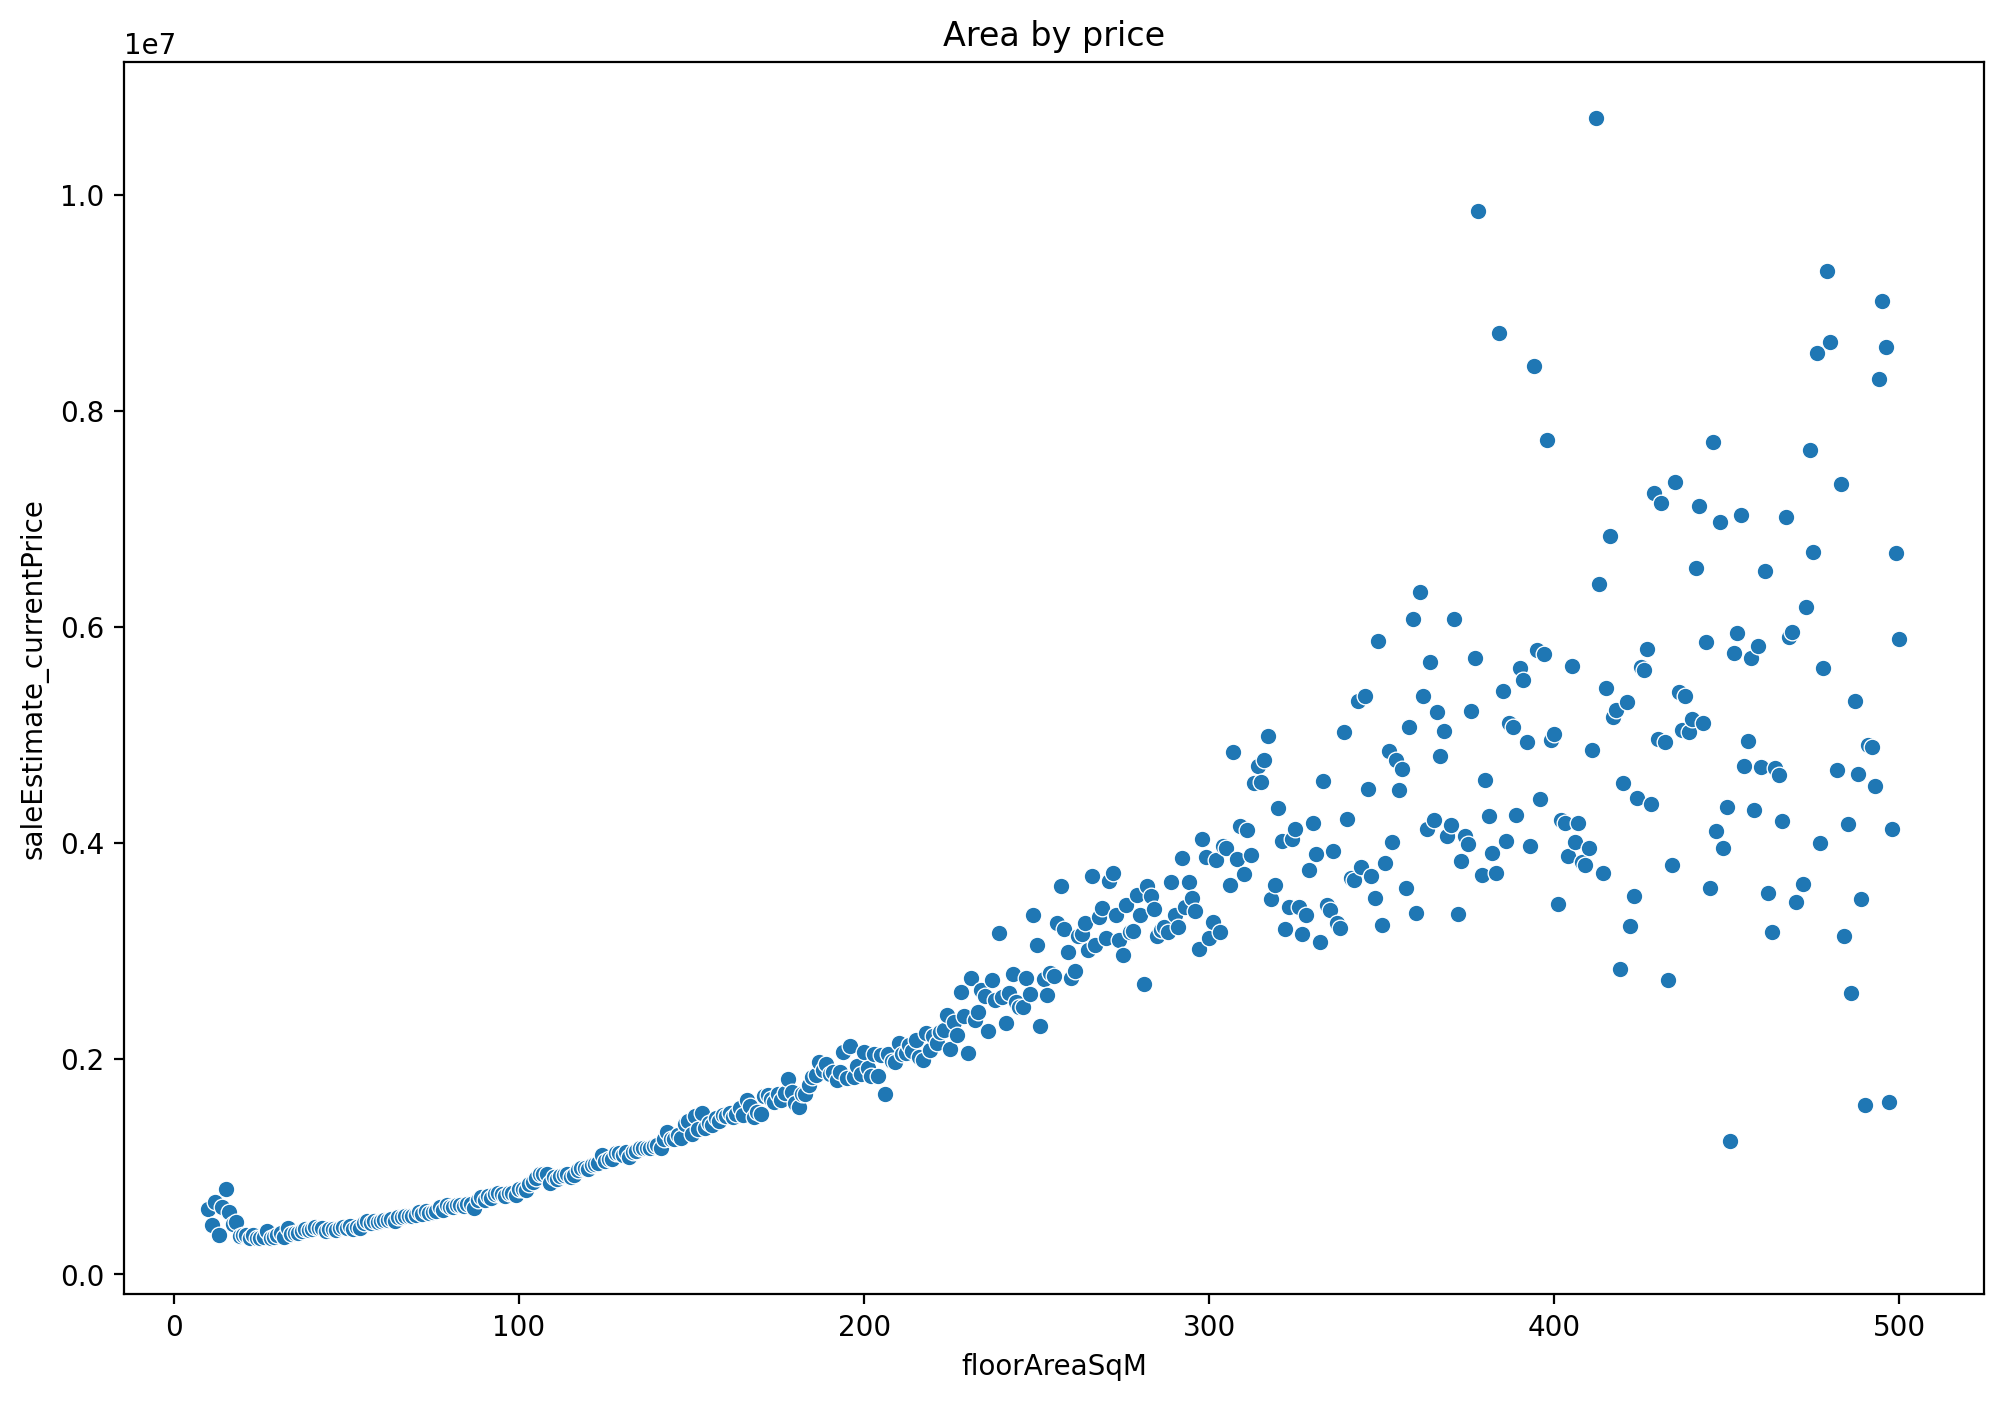

In [15]:
sqp = df.groupby(['floorAreaSqM'])['saleEstimate_currentPrice'].mean().reset_index()


plt.figure(figsize=(12, 8), dpi=200)

sns.scatterplot(data=sqp, x='floorAreaSqM', y='saleEstimate_currentPrice')

plt.title('Area by price')
plt.show()

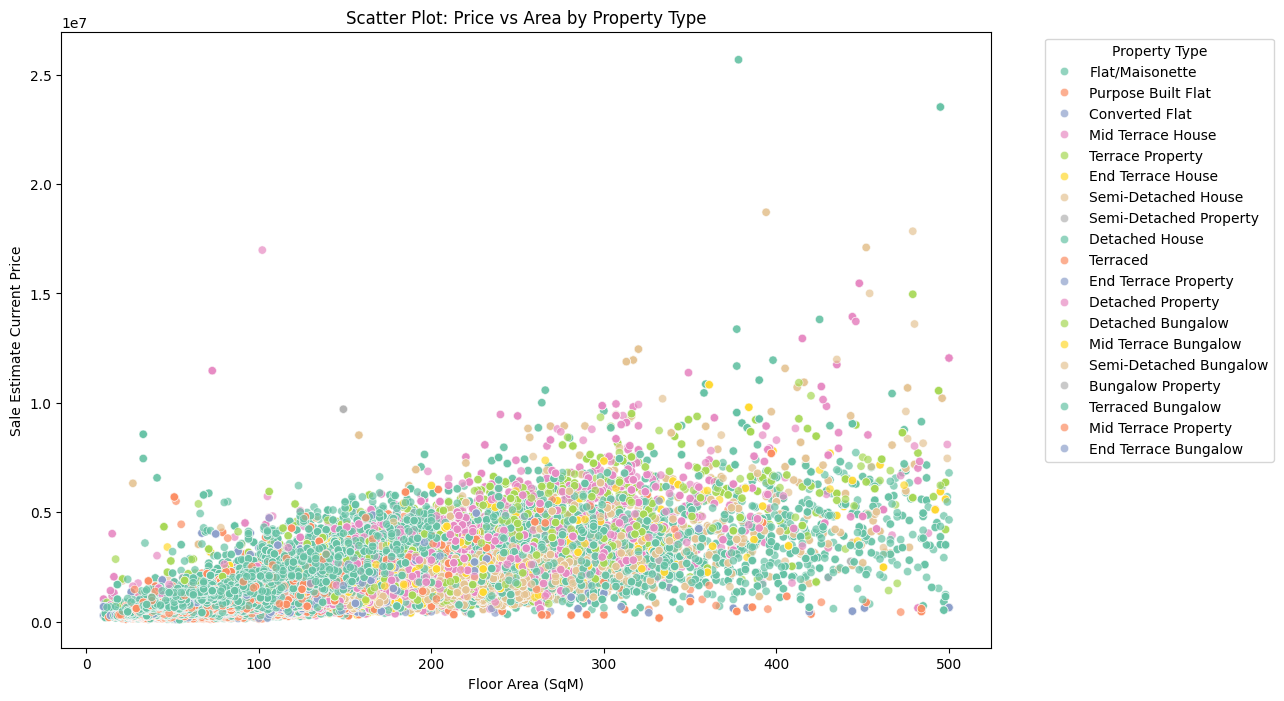

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='floorAreaSqM',  # Площадь
    y='saleEstimate_currentPrice',  # Цена
    hue='propertyType',  # Тип (отображается цветом)
    palette='Set2',
    alpha=0.7
)
plt.xlabel('Floor Area (SqM)')
plt.ylabel('Sale Estimate Current Price')
plt.title('Scatter Plot: Price vs Area by Property Type')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\tania\AppData\Local\Temp\ipykernel_16776\800853887.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_sqm_sorted, x='propertyType', y='pricePerSqM', palette='Blues_d')


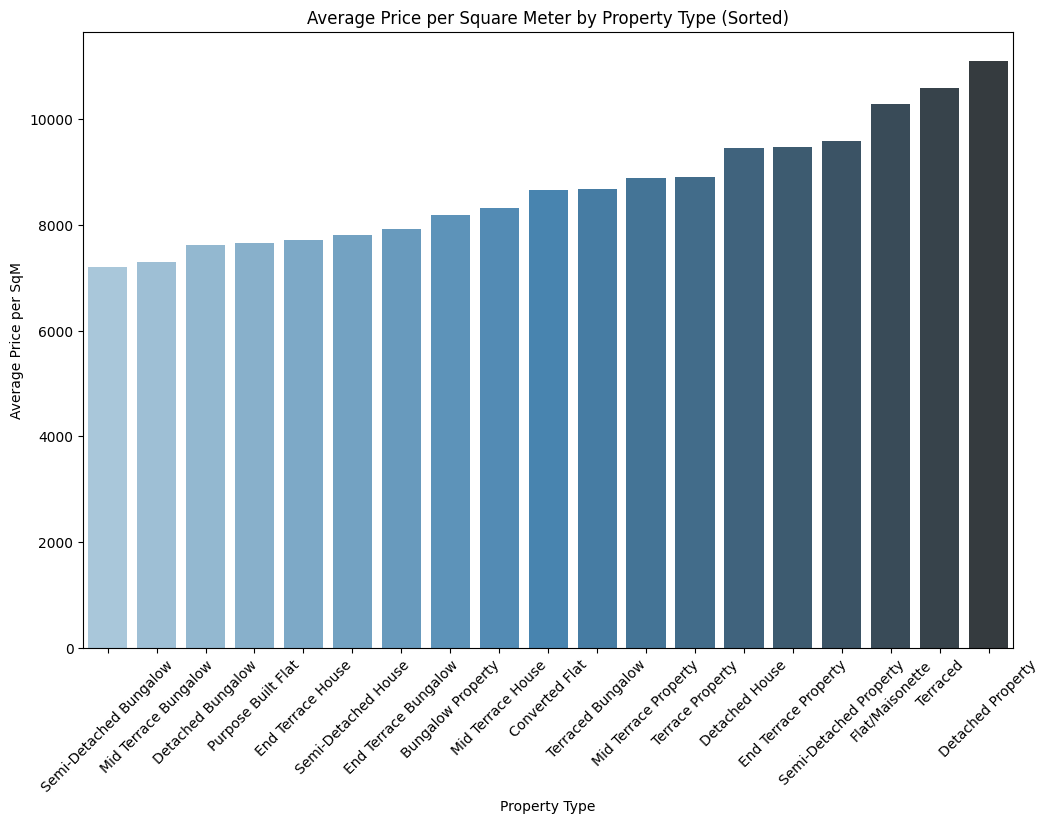

In [17]:
df['pricePerSqM'] = df['saleEstimate_currentPrice'] / df['floorAreaSqM']
# Группировка по propertyType и расчет средней цены за квадратный метр
avg_price_per_sqm = df.groupby('propertyType')['pricePerSqM'].mean().reset_index()
avg_price_per_sqm_sorted = avg_price_per_sqm.sort_values(by='pricePerSqM', ascending=True)

# Построение графика с отсортированными значениями
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_per_sqm_sorted, x='propertyType', y='pricePerSqM', palette='Blues_d')
plt.xlabel('Property Type')
plt.ylabel('Average Price per SqM')
plt.title('Average Price per Square Meter by Property Type (Sorted)')
plt.xticks(rotation=45)
plt.show()


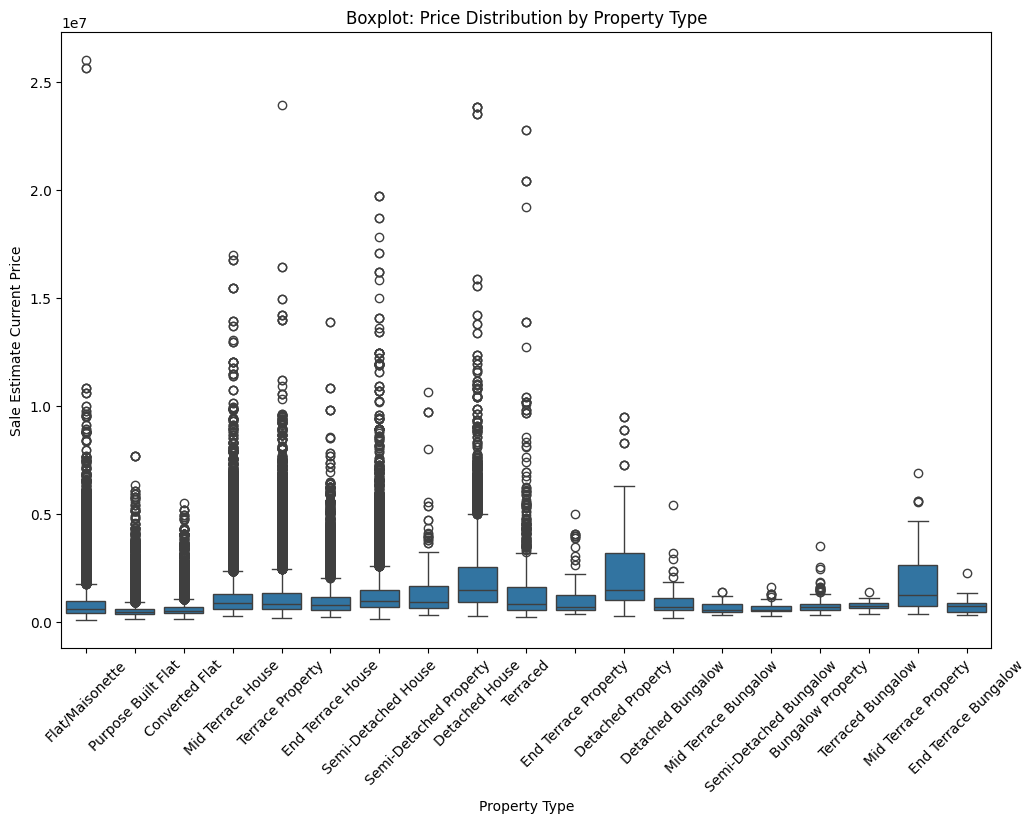

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='propertyType', y='saleEstimate_currentPrice')
plt.xlabel('Property Type')
plt.ylabel('Sale Estimate Current Price')
plt.title('Boxplot: Price Distribution by Property Type')
plt.xticks(rotation=45)  # Поворачивает подписи категорий для удобства
plt.show()


In [19]:
# Сгруппировать категории и отсортировать по средней цене за квадратный метр
avg_price_per_sqm_sorted = avg_price_per_sqm.sort_values(by='pricePerSqM', ascending=True)

# Создать словарь для замены категорий на числа
category_to_number = {category: i+1 for i, category in enumerate(avg_price_per_sqm_sorted['propertyType'])}

# Заменить категории на числа в исходном DataFrame
df['propertyType_numeric'] = df['propertyType'].map(category_to_number)

# Вывод результата
print(category_to_number)
print(df[['propertyType', 'propertyType_numeric']].head())


{'Semi-Detached Bungalow': 1, 'Mid Terrace Bungalow': 2, 'Detached Bungalow': 3, 'Purpose Built Flat': 4, 'End Terrace House': 5, 'Semi-Detached House': 6, 'End Terrace Bungalow': 7, 'Bungalow Property': 8, 'Mid Terrace House': 9, 'Converted Flat': 10, 'Terraced Bungalow': 11, 'Mid Terrace Property': 12, 'Terrace Property': 13, 'Detached House': 14, 'End Terrace Property': 15, 'Semi-Detached Property': 16, 'Flat/Maisonette': 17, 'Terraced': 18, 'Detached Property': 19}
         propertyType  propertyType_numeric
0     Flat/Maisonette                  17.0
1  Purpose Built Flat                   4.0
2  Purpose Built Flat                   4.0
3  Purpose Built Flat                   4.0
4  Purpose Built Flat                   4.0


In [20]:
df = df.drop(columns=['propertyType'])
df = df.drop(columns=['propertyType_numeric'])

In [21]:
df = df[df['saleEstimate_confidenceLevel'] != 'LOW']

In [22]:
df = df.drop(columns=['saleEstimate_confidenceLevel'])

In [23]:
# Координаты Букингемского дворца
buckingham_lat = 51.501364
buckingham_lon = 0.14189

# Расчет расстояния по теореме Пифагора
df['distance_from_buckingham'] = ((abs(df['latitude']) - buckingham_lat)**2 + 
                                  (abs(df['longitude']) - buckingham_lon)**2)**0.5



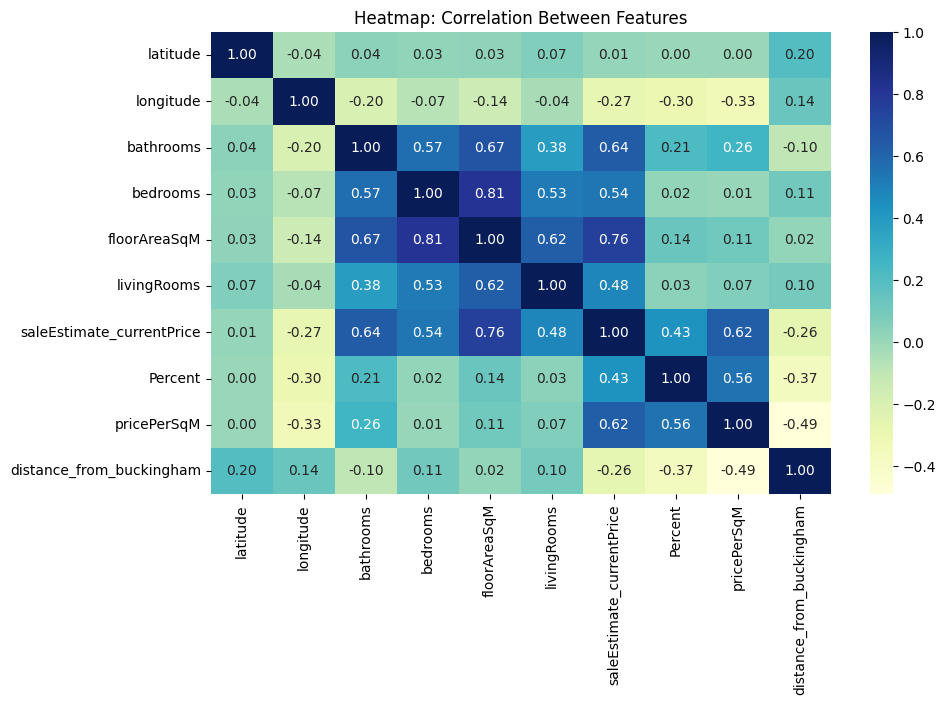

In [24]:
# Add a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Correlation Between Features")
plt.show()


# # Display correlation matrix 
# correlation_matrix = data.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix')
# plt.show()

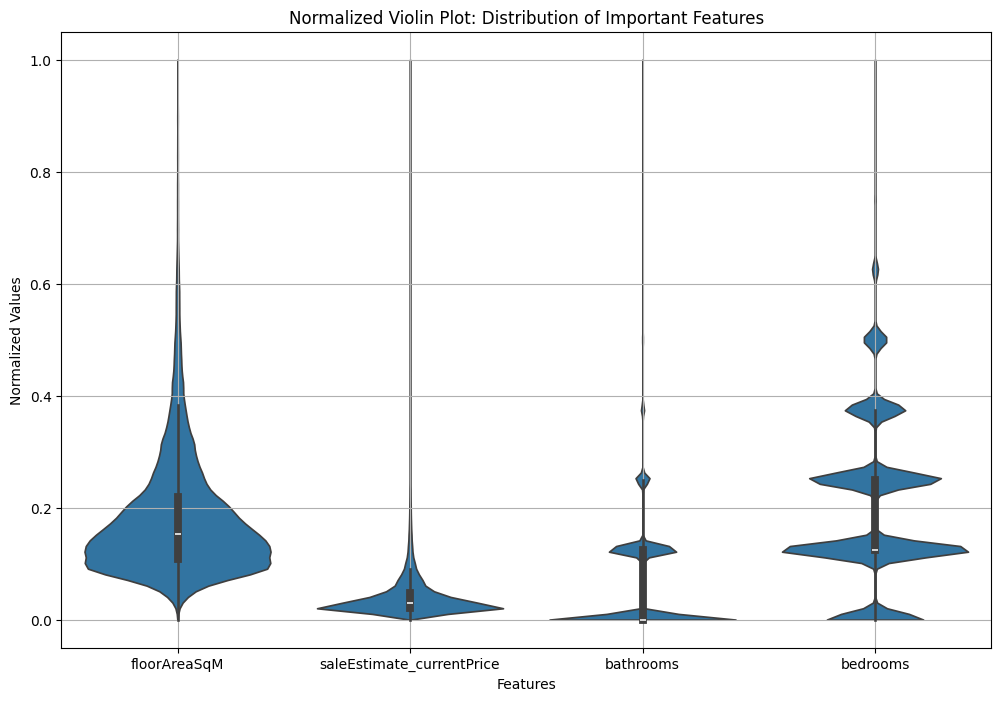

In [25]:
important_columns = ['floorAreaSqM', 'saleEstimate_currentPrice', 'bathrooms', 'bedrooms']
# Normalize the data
normalized_df = df[important_columns].copy()
for column in important_columns:
    normalized_df[column] = (normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min())

plt.figure(figsize=(12, 8))
df_melted = normalized_df.melt(var_name="Feature", value_name="Value")
sns.violinplot(x="Feature", y="Value", data=df_melted, density_norm="width", cut=0)
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.title("Normalized Violin Plot: Distribution of Important Features")
plt.grid(True)
plt.show()



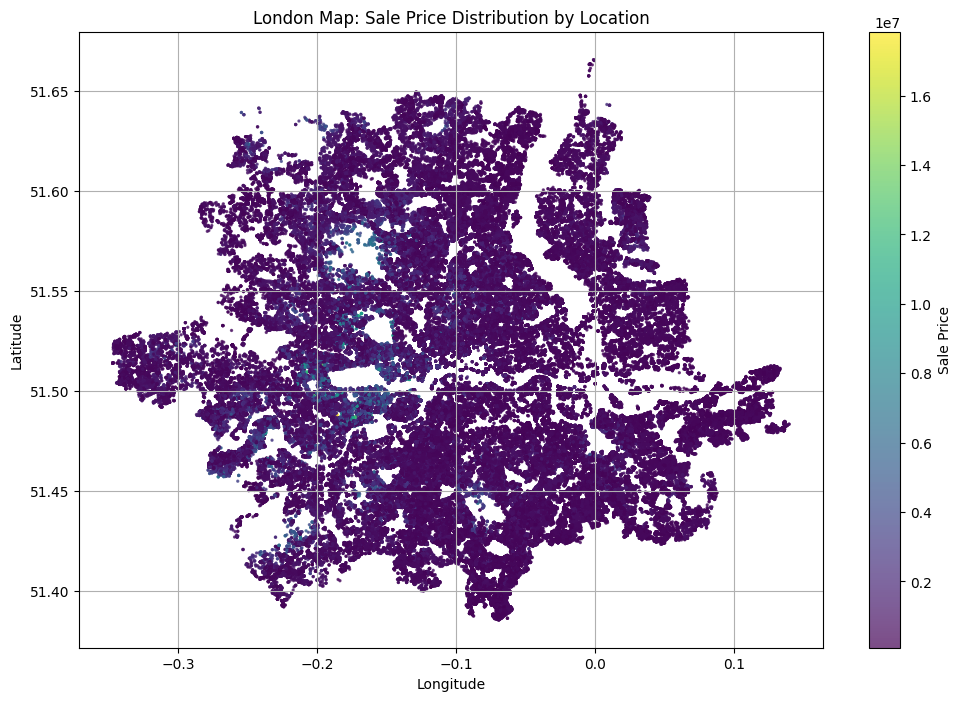

In [26]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [27]:
#def transform_ER()

In [28]:
lower_bound = df['saleEstimate_currentPrice'].quantile(0.05)  # 5th percentile
upper_bound = df['saleEstimate_currentPrice'].quantile(0.95)  # 95th percentile
df = df[(df['saleEstimate_currentPrice'] >= lower_bound) & (df['saleEstimate_currentPrice'] <= upper_bound)]

In [29]:
#lower_bound
#upper_bound

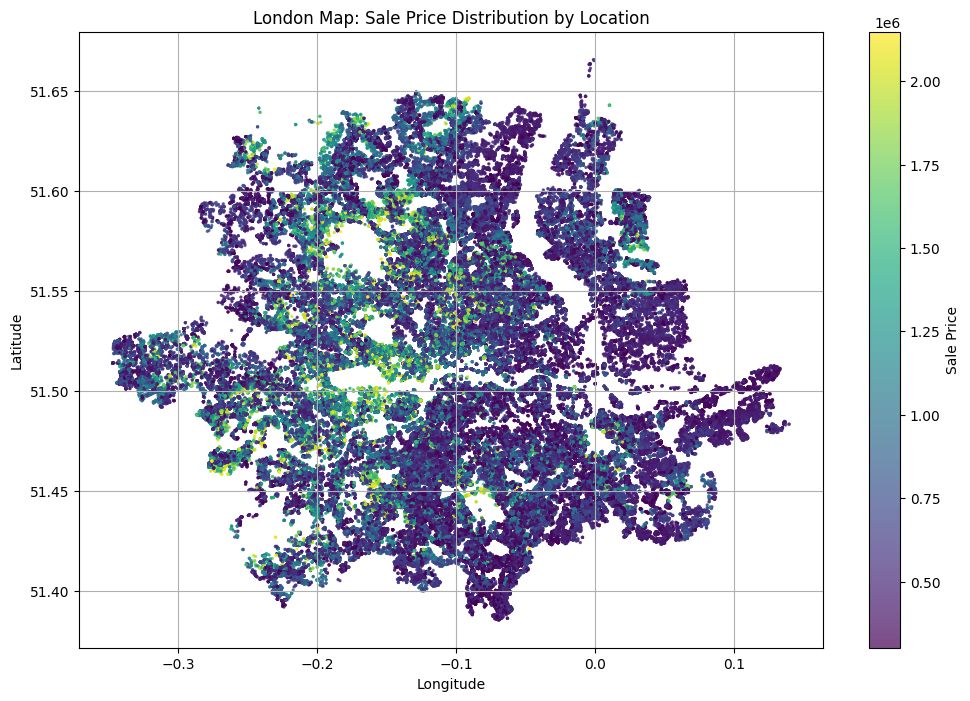

In [30]:
# Add a scatter plot on the map of London
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['saleEstimate_currentPrice'], cmap='viridis', s=2, alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("London Map: Sale Price Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [31]:
# Удаление столбцов latitude и longitude
#df = df.drop(['latitude', 'longitude'], axis=1)
df = df.drop(['latitude'], axis=1)

In [32]:
# Подсчет пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])


bathrooms       37267
bedrooms        16888
floorAreaSqM     9599
livingRooms     27154
Percent           599
pricePerSqM      9599
dtype: int64


In [33]:
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])


bathrooms       15.808384
bedrooms         7.163764
floorAreaSqM     4.071824
livingRooms     11.518524
Percent          0.254091
pricePerSqM      4.071824
dtype: float64


K Nearest Neighbors 

https://www.youtube.com/watch?v=0p0o5cmgLdE

https://www.youtube.com/watch?v=b6uHw7QW_n4

In [34]:
#df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
#df['livingRooms'].fillna(df['livingRooms'].median(), inplace=True)

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df[['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'Percent', 'pricePerSqM']] = imputer.fit_transform(df[['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'Percent', 'pricePerSqM']])

In [35]:
df = df.dropna()
#df = df.drop_duplicates()

In [36]:
df.shape

(188767, 9)

RMSE: 115981.7637179612
R2 Score: 0.9111257342648229


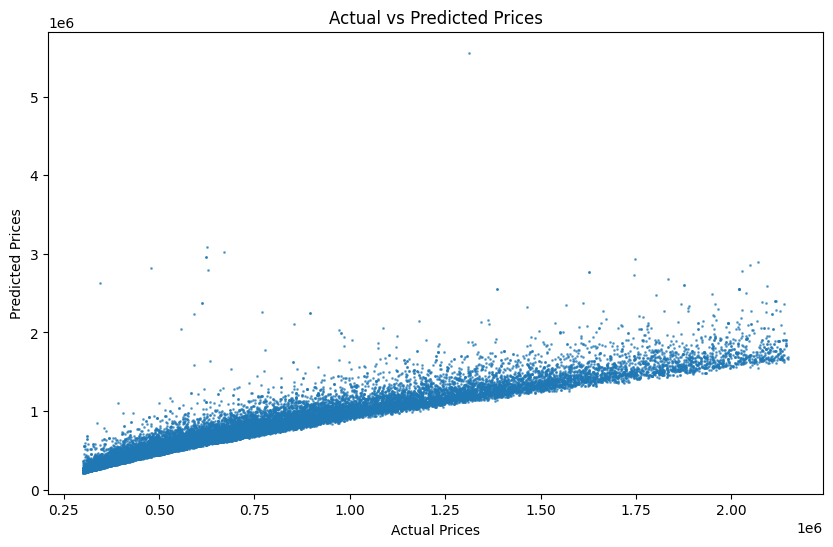

In [37]:
# Define features and target variable
X = df.drop(['saleEstimate_currentPrice'], axis=1)
y = df['saleEstimate_currentPrice']


# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков (только по тренировочным данным)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Скейлер обучается только на тренировочных данных
X_test = scaler.transform(X_test)       # Скейлер применяет ту же трансформацию к тестовым данным

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Визуализация фактических значений против предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [38]:
# Используем только площадь как признак
X = df[['floorAreaSqM']]  # Признаки: только площадь
y = df['saleEstimate_currentPrice']  # Целевая переменная: цена

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model2.predict(X_test)

# Оценка модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 266424.47186703584
R2 Score: 0.5310302445283751


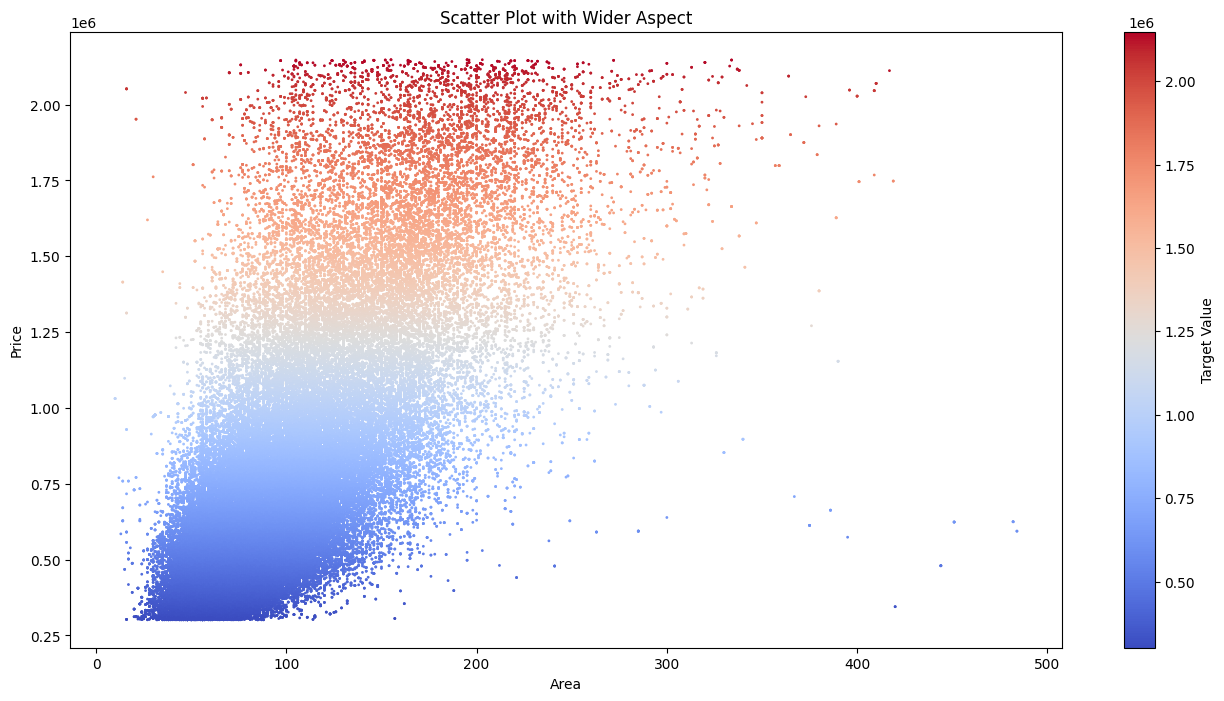

In [39]:
# Create a wider scatter plot
plt.figure(figsize=(16, 8))  # wide 16 high 8
plt.scatter(X, y, c=y, cmap='coolwarm', s=1)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot with Wider Aspect')
plt.colorbar(label='Target Value')
plt.show()


In [40]:

# Coefficients
a = model2.coef_[0]  # Для линейной регрессии с одной переменной X
b = model2.intercept_

# linear regression
print(f"Уравнение: y = {a}x + {b}")

Уравнение: y = 6804.774611361827x + 89987.22931182501


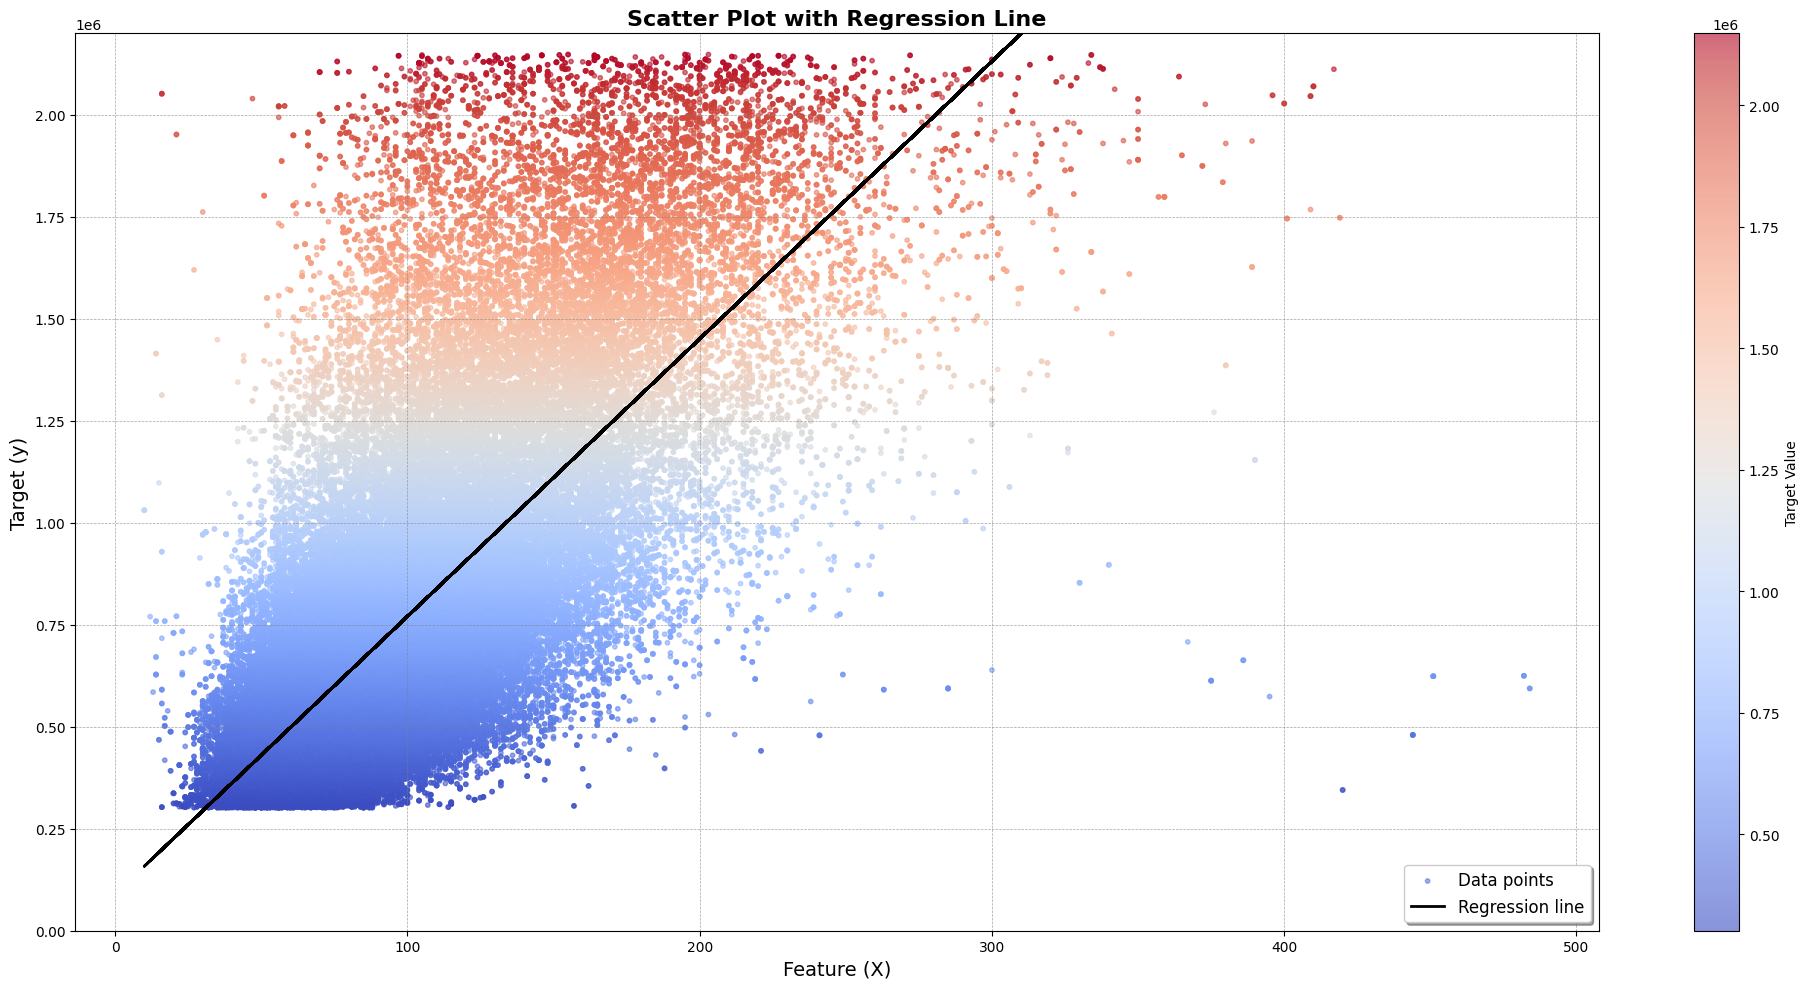

In [41]:
# Create a wider scatter plot with a regression line and limited y-axis
plt.figure(figsize=(20, 10))  # Set figure size

# Scatter plot with color map
plt.scatter(X, y, c=y, cmap='coolwarm', alpha=0.6, s=10, label='Data points')

# Add regression line
plt.plot(X, model2.predict(X), color='black', linewidth=2, label='Regression line')

# Titles and labels
plt.title('Scatter Plot with Regression Line', fontsize=16, fontweight='bold')
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (y)', fontsize=14)

# Limit y-axis to 2 million
plt.ylim(0, 2_200_000)  # Set lower limit to 0 and upper limit to 2 million

# Add grid and color bar
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.colorbar(label='Target Value')
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
# Make a prediction for a specific floor area
X_new = [[75]]  # Floor area in square meters (example: 75 m²)
print(model2.predict(X_new))  # Output: predicted price for 75 m²

[600345.32516396]


c:\Users\tania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Data and Movement Coordination Specialist

Flow and Data Operations Specialist

Data-Driven Flow Coordinator

Logistics and Data Flow Specialist

Stream Coordination and Data Analyst

Data and Flow Strategy Specialist

Movement and Data Integration Coordinator

Data and Operational Flow Specialist

Dynamic Flow and Data Specialist

Data-Enabled Flow Coordinator
